# KBMod Analysis Demo

To run an example of kbmod from start to finish you can use the following steps:

1) Setup `kbmod`'s analysis tools with `pip install .[analysis]` in the main directory of the repo.

2) Run `example_search.py` with the following settings:

  * **image_dir**: The directory with the images from a single field. If you do not have an example data set, you can use `fake_data_creator.py` to create one.

  * **results_dir**: The directory where you want to save the results

  * **results_suffix**: Suffix to add when saving results files. Setting this as `test` then files will be saved as "..._test.txt". Five results files would be saved:
      * `lc_test.txt`: File with the light curves from results after going through Kalman Filter.
      * `results_test.txt`: File with the x,y pixel locations, velocity, flux, likelihood, and number of unmasked observations of each result.
      * `ps_test.txt`: File with the summed postage stamp for each result.
      * `times_test.txt`: File with the MJD of each observation in the saved lightcurve.
      * `filtered_likes_test.txt`: The recalculated likelihood values for each results after removing observations with the Kalman Filter.
  * **time_file**: [Optional] Location of a file with each row containing (visit_num, visit_mjd) for observations in dataset.
    
3) Command will be like the following:

```
python3 example_search.py --image_dir image_dir --results_dir results_dir --results_suffix test --time_file image_times.dat
```

4) Once you have the results you can use the steps in this notebook to create plots with postage stamps and lightcurves side-by-side for a final look by eye.
  You will first have to update some variables to match the arguments you chose for example_search.py in step 3.
  * Change results_dir to match --results_dir option.
  * Change results_suffix to match --results_suffix option.
  
Note that fake result data (corresponding to the `data/demo` images) is included in `data/fake_results` with the suffix DEMO.

In [1]:
# Directory where output from kbmod search are located
results_dir = "../data/fake_results/"
results_suffix = "DEMO"

In [2]:
import os
import matplotlib.pyplot as plt

from kbmod.analysis.create_stamps import *
from kbmod.image_info import *
from kbmod.file_utils import *

%matplotlib inline

In [3]:
stamper = CreateStamps()

Load the lightcurve file and the index of valid time steps.

In [4]:
lc_filename = "".join([results_dir, "lc_", results_suffix, ".txt"])
lc_index_filename = "".join([results_dir, "lc_index_", results_suffix, ".txt"])
lc_list, lc_index_list = stamper.load_lightcurves(lc_filename, lc_index_filename)
print(f"Loaded {len(lc_list)} lightcurves.")

Loaded 1 lightcurves.


Load the co-added stamps for each result.

In [5]:
stamp_filename = "".join([results_dir, "ps_", results_suffix, ".txt"])
stamps = stamper.load_stamps(stamp_filename)
print(stamps.shape)

(1, 441)


Load the results file.

In [6]:
result_filename = "".join([results_dir, "results_", results_suffix, ".txt"])
results = stamper.load_results(result_filename)

Plot the stamps.

Center filtering keeps 1 out of 1 stamps.


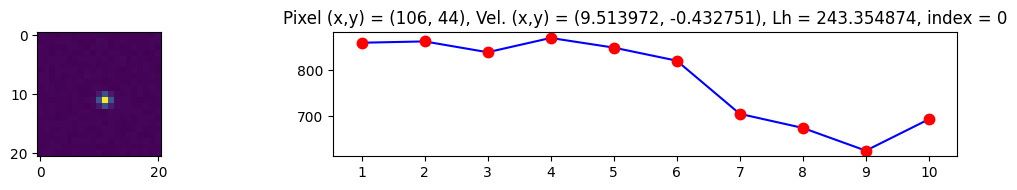

In [7]:
stamps_fig = stamper.plot_stamps(results, lc_list, lc_index_list, stamps, 0.03)

### Use the results file to generate the on sky positions at each image time.

First load the image meta-data for all the files and the time stamps for the images. Typically the time stamps will either come from the FITS files themselves or from an auxiliary file (as shown below).

In [8]:
img_dir = "../data/demo"
file_names = [f"{img_dir}/{f}" for f in sorted(os.listdir(img_dir))]

img_info = ImageInfoSet()
img_info.load_image_info_from_files(file_names, visit_in_filename=[0, 6])
print(f"Loaded data for {img_info.num_images} images.")

img_info.load_times_from_file("../data/demo_times.dat")
print(f"Using times: {img_info.get_all_mjd()}")

Loaded data for 10 images.
Using times: [57130.2, 57130.21, 57130.22, 57131.2, 57131.21, 57131.22, 57132.2, 57132.21, 57132.22, 57133.2]


Take the first result (special casing the instance where there is only one result) and convert it into a trajectory using the `trajectory_from_np_object` from `file_utils.py`.

In [9]:
# Take the first result, special cases instances where there is only one result.
if len(results.shape) > 0:
    result0 = results[0]
else:
    result0 = results
trj0 = FileUtils.trajectory_from_np_object(result0)

print(f"Finding positions of trajectory {trj0}")

Finding positions of trajectory lh: 243.354874 flux: 780.256409 x: 106 y: 44 x_v: 9.513972 y_v: -0.432751 obs_count: 10


Use the image information to compute the coordinates on the sky.

In [10]:
sky_pos = img_info.trajectory_to_skycoords(trj0)
for i, pos in enumerate(sky_pos):
    print(f"{i}: ({pos.ra.degree}, {pos.dec.degree})")

0: (200.46750444773153, -7.720836307744057)
1: (200.46750411474895, -7.720843252864124)
2: (200.46750378176637, -7.72085019798419)
3: (200.46747114941977, -7.7215308197582795)
4: (200.46747081643608, -7.721537764878495)
5: (200.4674704834524, -7.721544709998717)
6: (200.46743785099767, -7.7222253317876435)
7: (200.4674375180129, -7.722232276908018)
8: (200.4674371850281, -7.722239222028387)
9: (200.4674045524653, -7.72291984383197)
